In [1]:
import pandas as pd
import os

# Function to load and process the LoRaWAN dataset from a given environment
def load_lorawan_dataset(env_path):
    files = os.listdir(env_path)
    data_list = []

    for file in files:
        if file.endswith('.txt'):  # Ignore any non-txt file (e.g., the 'test' item in Environment 2)
            distance, position = file.split('.')[0].split('D')
            distance = distance.strip()  # Distance value
            position = 'D' + position.strip()  # Position value

            with open(os.path.join(env_path, file), 'r') as f:
                for line in f:
                    if line.strip():
                        node, rssi = line.split(':')
                        data_list.append({
                            'Node': node.strip(),
                            'RSSI': int(rssi.strip()),
                            'Distance': distance,
                            'Position': position
                        })

    return pd.DataFrame(data_list)

# Load LoRaWAN datasets for both environments
env1_lorawan_data = load_lorawan_dataset("C:\\Users\\Hamza Khalid\\Desktop\\Mam Afeera\\Provided data\\Environment 1\\LoRaWAN")
env2_lorawan_data = load_lorawan_dataset("C:\\Users\\Hamza Khalid\\Desktop\\Mam Afeera\\Provided data\\Environment 2\\LoRaWAN")

# Combine datasets from both environments into one dataframe
combined_lorawan_data = pd.concat([env1_lorawan_data, env2_lorawan_data], ignore_index=True)

# Display the structure of the combined dataset
combined_lorawan_data.head(), combined_lorawan_data.describe()


(     Node  RSSI Distance Position
 0  Node B   -23        1       D1
 1  Node C   -32        1       D1
 2  Node A   -24        1       D1
 3  Node B   -24        1       D1
 4  Node C   -32        1       D1,
               RSSI
 count  5760.000000
 mean    -30.971181
 std       4.649948
 min     -53.000000
 25%     -35.000000
 50%     -31.000000
 75%     -27.000000
 max     -23.000000)

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Initialize label encoders
node_encoder = LabelEncoder()
distance_encoder = LabelEncoder()

# Encode categorical columns
combined_lorawan_data['Node'] = node_encoder.fit_transform(combined_lorawan_data['Node'])
combined_lorawan_data['Distance'] = distance_encoder.fit_transform(combined_lorawan_data['Distance'])

# Define features (X) and label (y)
X = combined_lorawan_data[['Node', 'RSSI']]  # Using 'Node' and 'RSSI' as features
y = combined_lorawan_data['Distance']  # Using 'Distance' as the label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (4608, 2)
X_test shape: (1152, 2)
y_train shape: (4608,)
y_test shape: (1152,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the models
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
mlp = MLPClassifier(max_iter=1000)  # Increased max_iter for convergence
svm = SVC()
naive_bayes = GaussianNB()

models = {
    "KNN": knn,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Neural Network": mlp,
    "SVM": svm,
    "Naive Bayes": naive_bayes
}

# Dictionary to store accuracy of each model
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

accuracy_scores


{'KNN': 0.7647569444444444,
 'Decision Tree': 0.7899305555555556,
 'Random Forest': 0.7899305555555556,
 'Neural Network': 0.6831597222222222,
 'SVM': 0.6692708333333334,
 'Naive Bayes': 0.6328125}

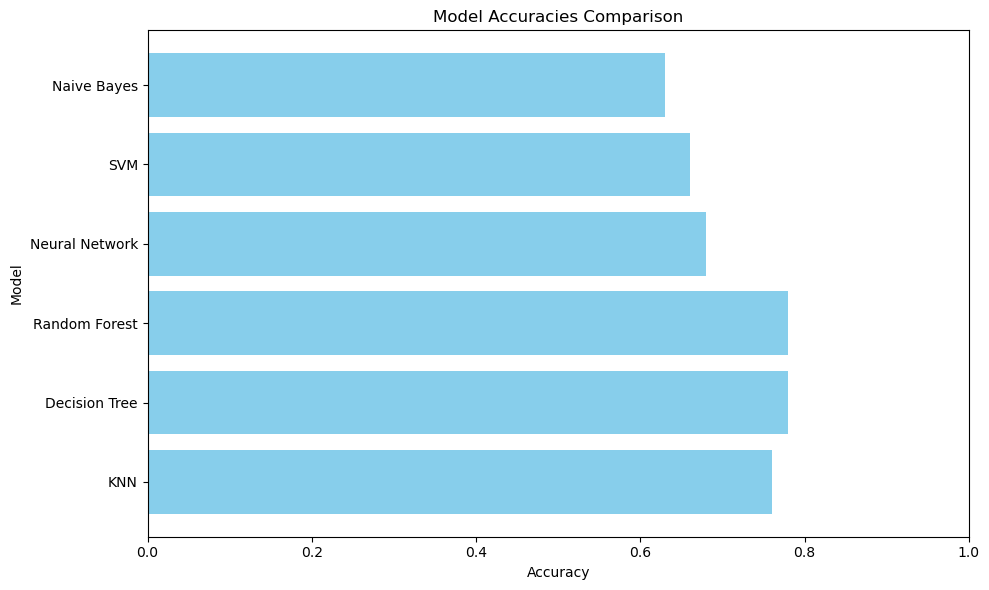

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Example model accuracies
model_accuracies = {
    "KNN": 0.76,
    "Decision Tree": 0.78,
    "Random Forest": 0.78,
    "Neural Network": 0.68,
    "SVM": 0.66,
    "Naive Bayes": 0.63
}

# Convert dictionary to DataFrame for plotting
accuracies_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(accuracies_df['Model'], accuracies_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies Comparison')
plt.xlim(0, 1)  # Ensure the x-axis starts at 0 and ends at 1 for clarity
plt.tight_layout()  # Adjust layout to make room for the labels

# Display the plot
plt.show()
